In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

### Breast Cancer Dataset

This time we will work with the Breast Cancer Wisconsin Dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
The original data are taken from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

The dataset contain 30 features/variables and 569 samples. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

For each cell nucleus 10 real-valued features are computed for:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)


For each of these feature the dataset contain 3 values:the mean, standard error and "worst" or largest.
Resulting in total 30 features. For instance, feature/column 3 is Mean Radius, feature 13 is Radius Standard Error, feature 23 is Worst Radius.

For every sample the target variable (y) indicates the class:
- 0, malignant tumor
- 1, benign tumor

Class distribution: 357 benign, 212 malignant


### Logistic Regression model as Classifier

The goal of the excercise is to build a classifier model using logistic regression, able to distinguish between malignant and benign tumors. We will initially select only 3 features and build a model on those. Feel free to extend the model using more or others feature. Does the result improve or is it worse? Can you find a better combination of features?

The 3 features we consider are mean area, mean smoothness and mean compactness. 

In [3]:
cancer_data= datasets.load_breast_cancer()
cancer_X = cancer_data.data[:,[3,4,5]]#mean area, mean smoothness and mean compactness.
cancer_y = cancer_data.target

alldata = pd.DataFrame(data=np.c_[cancer_X, cancer_y], columns=list(cancer_data.feature_names[3:6])+['target'])


Let's first visualise the data we are going to model. Is here a Logistic Model appropriate? why?
Answer: yes, data is linearly separable.

In [ ]:
#if you don't have seaborn module, you need to first install it via conda or pip
import seaborn as sns
sns.pairplot(pd.DataFrame(alldata),hue='target',vars=list(cancer_data.feature_names[3:6]))
plt.show()


Let's split the data in training and test data. 
Feel free to change the proportion between train& test. 


In [5]:
#num_test_data = int(0.2 * alldata.shape[0]) #we leave 20% of data for testing the model 

In [6]:
#cancer_X_train = cancer_X[:-num_test_data]
#cancer_X_test = cancer_X[-num_test_data:]

#cancer_y_train = cancer_y[:-num_test_data]
#cancer_y_test = cancer_y[-num_test_data:]

cancer_X_train, cancer_X_test, cancer_y_train, cancer_y_test = train_test_split(
    cancer_X, cancer_y, test_size=0.20, random_state = 99)

#If you need> Pass an int to the parameter random_state for reproducible output across multiple function calls. 

The input data is not standardised (standardise the data means transform the data so that they have mean 0 and std dev 1).
This is a good practise, especially when data have very different ranges. 


In [7]:
scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train)
cancer_X_test = scaler.transform(cancer_X_test)
#did you notice that the scaler is applied both to training and test data but it is fitted ONLY on training data?
#can you guess why?
#answer: if you would have computed the scaler function using also test data, part of this information would have been implicitly
#been included in the training data, because they would have been scaled with coefficients who "knew" the test data

Great! All data have been prepared! Now it is your moment.

Complete the following steps of modelling by adding the necessary code under where #ADD YOUR CODE ## is indicated. 

First create the logistic regression model using the sklearn function:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [3]:
log_reg = LogisticRegression()#### ADD YOUR CODE HERE

Now train (=fit) the model on the training data (cancer_X_train, cancer_y_train).

Use here the methods listed for the LogisticRegression classifier, you find them in the sklearn link above or in the lecture slide 15. Remember that the methods (python function) need to be called from the correspondent object. 
So for example if LogisticRegression had a method called "compute_something(a,b)", I would need to call it as follows:
log_reg.compute_something(mya, myb)

In [9]:
log_reg.fit(cancer_X_train, cancer_y_train)#### ADD YOUR CODE HERE

LogisticRegression()

Let's print now the model parameters (coefficients (=theta1, theta2....) and intercept (=theta_0)
As usual find the correct method as above.

In [10]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-3.58323553 -0.68162137 -1.15251185]]
[0.47066152]


Let's now try to predict the class outcome for the test data (cancer_X_test). 
If you would want to predict the probability you would use log_reg.predict_proba, which method do you use to predict the discrete class to which the test samples belong?

In [ ]:
y_proba = log_reg.predict_proba(cancer_X_test)

y_pred = log_reg.predict(cancer_X_test) #ADD YOU CODE HERE####

pd.DataFrame(np.c_[y_proba,y_pred], columns = ['Probability '+list(cancer_data.target_names)[0], 
                                               'Probability '+list(cancer_data.target_names)[1],
                                                'Predicted Class'])


Let's now check the accuracy of our model using the TEST data, 
both input (cancer_X_test) and known exact true class(cancer_y_test). 

As usual, check among the methods of LogisticRegression the right one to use.

In [13]:
mean_accuracy = log_reg.score(cancer_X_test, cancer_y_test) #ADD YOU CODE HERE####
print("The accuracy of your model is {0}%".format(np.round(mean_accuracy*100),2))

The accuracy of your model is 92.0%


Not bad! Try now to select new or more feature from the original dataset and see if there are features which can improve the model or that make it worse.


In Classification problem it is always good to not just consider the accuracy of your model but to visualise also the confusion matrix which show you how many cases you correclty classified but also if your mislabeled cases were false positive or false negative.
We will discuss about this more next week.

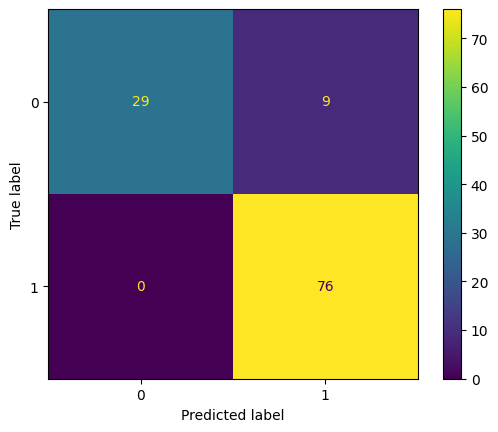

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# for this plot sklearn >= 1.0.1 is needed

cm = confusion_matrix(cancer_y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [13]:
#Source: Notebook adapted from A.Geron, Hands On ML with Scikit-Learn, Keras und Tensorflow, O'Reilly